<a href="https://colab.research.google.com/github/sapsan14/ml-course-2026/blob/main/ex2/EX03_adults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EX03 - Täiskasvanute sissetulek


*   **Ülesande Notebook'i nimi peab olema 'EX03_adults.ipynb'**
*   **See Notebook on readonly õigustes, tee sellest endale koopia File --> Save a copy in Drive**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

## 1) Andmete laadimine
Määra `adult.data` faili asukoht ja veergude nimed vastavalt algsele andmestikule.

**Märkus veerunimede kohta:**
Veerunimed saad võtta kas:
- veebilehelt, kust andmestik alla laaditi (nt UCI Machine Learning Repository),
- või `adult.names` faili lõpust, mis on allalaaditud andmestikuga samas kaustas.

Failis ja veebilehel on mõnes nimes sidekriips (nt `education-num`, `marital-status`).
Kuna Pythonis veerunimed ei tohi sisaldada sidekriipse, tuleb need asendada alakriipsudega:
näiteks `education-num` → `education_num`, `marital-status` → `marital_status`.

**Sinu ülesanne:** täida allolev `column_names` järjend sobivate veerunimedega,
kasutades `adult.names` faili või veebilehel toodud infot.

**Kontrolli:**
- Andmestikul on 15 veergu.
- `df.head()` kuvab eelduspäraseid veerge ja väärtusi.
- *Vihje:* kasuta `len(column_names)` ja `df.shape`.

In [2]:
if "google.colab" in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    file_path = "/content/drive/MyDrive/google_colab/adult/adult.data" # muuda, kui fail asub mujal
else:
    file_path = "adult/adult.data"

column_names = [
    "age", "workclass", "fnlwgt", "education", "education_num",
    "marital_status", "occupation", "relationship", "race", "sex",
    "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"
]


df_raw = pd.read_csv(file_path, names=column_names, sep=',', index_col=False, skipinitialspace=True)
df_raw.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 2) Puuduvate väärtuste käsitlemine
Mõnes kategoorilises veerus on puuduvaid väärtusi kujul `'?'`. Asendame need `NaN`-idega
ja eemaldame read, kus esineb puuduvaid väärtusi (lihtne esmane lähenemine uuriva andmeanalüüsi jaoks).

**Sinu ülesanne:** eemaldada või käsitleda ebaõigeid väärtusi, et analüüs oleks usaldusväärne.

**Kontrolli:**
- `df.isna().sum()` annab pärast puhastamist kõikjal 0.
- Salvesta muutujatesse ridade arv enne ja pärast puhastamist (`rows_before` ja `rows_after`) ning võrdle neid.

In [3]:
df_clean = df_raw.copy()
# Replace ? with NaN
df_clean.replace('?', np.nan, inplace=True)
# Drop NaNs
df_clean.dropna(inplace=True)
rows_before = df_raw.shape[0]
rows_after = df_clean.shape[0]
print(f"Rows before: {rows_before}, Rows after: {rows_after}")

Rows before: 32561, Rows after: 30162


## 3) Binaarne tuluveeru versioon
Loome `income_binary`:
- 1, kui `income` on `>50K`
- 0, vastasel juhul

**Sinu ülesanne:** luua uus veerg `income_binary` ja kontrollida, et väärtused on ainult 0/1.

**Kontrolli:**
- `'income_binary' in df.columns` on `True`.
- `set(df['income_binary'].unique())` ⊆ `{0, 1}`.

In [4]:
df_model = df_clean.copy()
# Create binary income: 1 if >50K, 0 otherwise
# Note: Data might have leading spaces, so strip
df_model['income_binary'] = (df_model['income'].str.strip() == '>50K').astype(int)
print(df_model['income_binary'].value_counts())

income_binary
0    22654
1     7508
Name: count, dtype: int64


## 4) Lihtsad andmeanalüüsi ülesanded

Selles osas harjutad andmete uurimist Pandase abil ning salvestad tulemused muutujatesse.

**Sinu ülesanne:** arvuta allpool toodud väärtused ja salvesta need vastavatesse muutujatesse.

In [5]:
df_analysis = df_model.copy()

# 4.1 Number of females > 50K
female_over_50k = df_analysis[(df_analysis['sex'].str.strip() == 'Female') & (df_analysis['income_binary'] == 1)].shape[0]

# 4.2 Number of males > 50K
male_over_50k = df_analysis[(df_analysis['sex'].str.strip() == 'Male') & (df_analysis['income_binary'] == 1)].shape[0]

# 4.3 Total > 50K
total_over_50k = df_analysis[df_analysis['income_binary'] == 1].shape[0]

# 4.4 % females > 50K
females = df_analysis[df_analysis['sex'].str.strip() == 'Female']
female_over_50k_pct = (female_over_50k / len(females)) * 100 if len(females) > 0 else 0

# 4.5 % males > 50K
males = df_analysis[df_analysis['sex'].str.strip() == 'Male']
male_over_50k_pct = (male_over_50k / len(males)) * 100 if len(males) > 0 else 0

# 4.6 Avg age > 50K
avg_age_over_50k = df_analysis[df_analysis['income_binary'] == 1]['age'].mean()

# 4.7 Avg age <= 50K
avg_age_under_50k = df_analysis[df_analysis['income_binary'] == 0]['age'].mean()

# Kuvame tulemused
print(f"Female >50K: {female_over_50k}")
print(f"Male >50K: {male_over_50k}")
print(f"Total >50K: {total_over_50k}")
print(f"Female >50K %: {female_over_50k_pct:.2f}%")
print(f"Male >50K %: {male_over_50k_pct:.2f}%")
print(f"Avg age >50K: {avg_age_over_50k:.2f}")
print(f"Avg age <=50K: {avg_age_under_50k:.2f}")

Female >50K: 1112
Male >50K: 6396
Total >50K: 7508
Female >50K %: 11.37%
Male >50K %: 31.38%
Avg age >50K: 43.96
Avg age <=50K: 36.61


## 5) Visualiseerimine

**Sinu ülesanne:**
- Koosta järgmised graafikud kasutades seaborn ja matplotlib:
  1. Vanuse jaotus (histogramm).
  2. Keskmised töötunnid ametite lõikes (tulpdiagramm).
  3. Numbriliste tunnuste korrelatsioonimaatriks (sh `income_binary`) – soojuskaart.
  4. Töötundide jaotus soo lõikes (histogramm).
  5. Vanus tulugruppide lõikes (viiuldiagramm).

**Kontrolli:**
- Kõigil graafikutel on pealkiri ja telgede sildid.
- Korrelatsioonimaatriks kasutab ainult sobivaid numbrilisi veerge.
- *Vihje:* vajadusel tee kategooriate telje sildid loetavaks `plt.xticks(rotation=45)`.

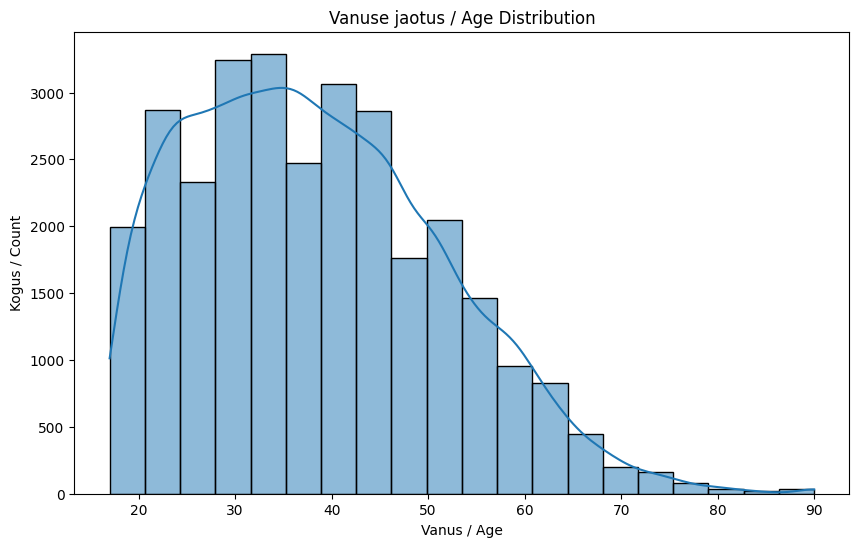

In [6]:
df_viz = df_analysis.copy()

# Vanuse jaotus (histogramm)
plt.figure(figsize=(10, 6))
sns.histplot(df_viz['age'], bins=20, kde=True)
plt.title('Vanuse jaotus / Age Distribution')
plt.xlabel('Vanus / Age')
plt.ylabel('Kogus / Count')
plt.show()

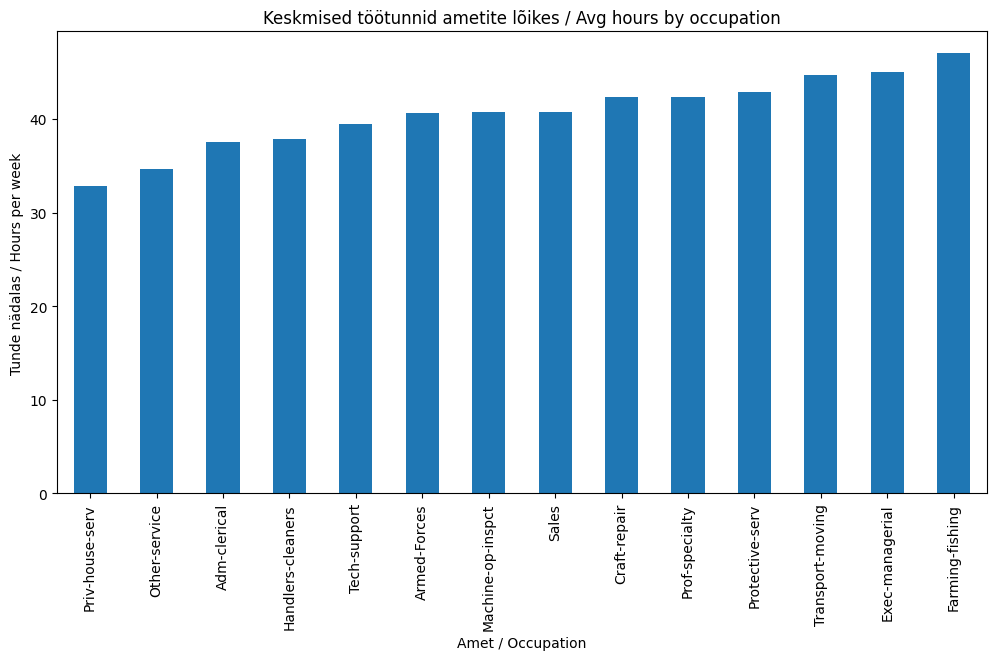

In [7]:
# Keskmised töötunnid ametite lõikes (tulpdiagramm)
plt.figure(figsize=(12, 6))
df_viz.groupby('occupation')['hours_per_week'].mean().sort_values().plot(kind='bar')
plt.title('Keskmised töötunnid ametite lõikes / Avg hours by occupation')
plt.xlabel('Amet / Occupation')
plt.ylabel('Tunde nädalas / Hours per week')
plt.xticks(rotation=90)
plt.show()

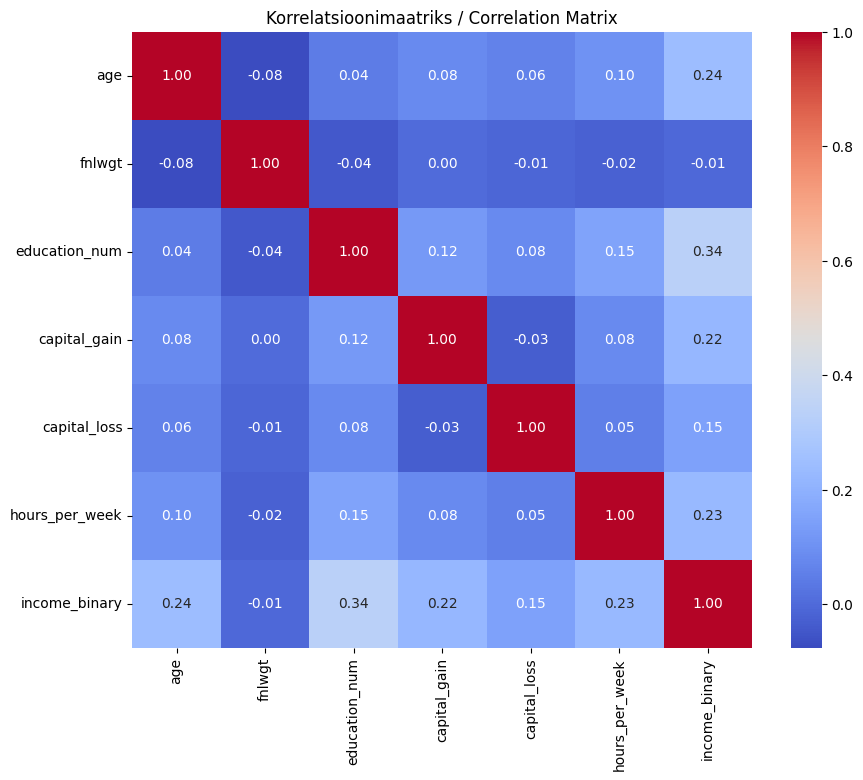

In [8]:
# Korrelatsioonid arvuliste tunnuste vahel (sh income_binary)
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation
numeric_df = df_viz.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korrelatsioonimaatriks / Correlation Matrix')
plt.show()

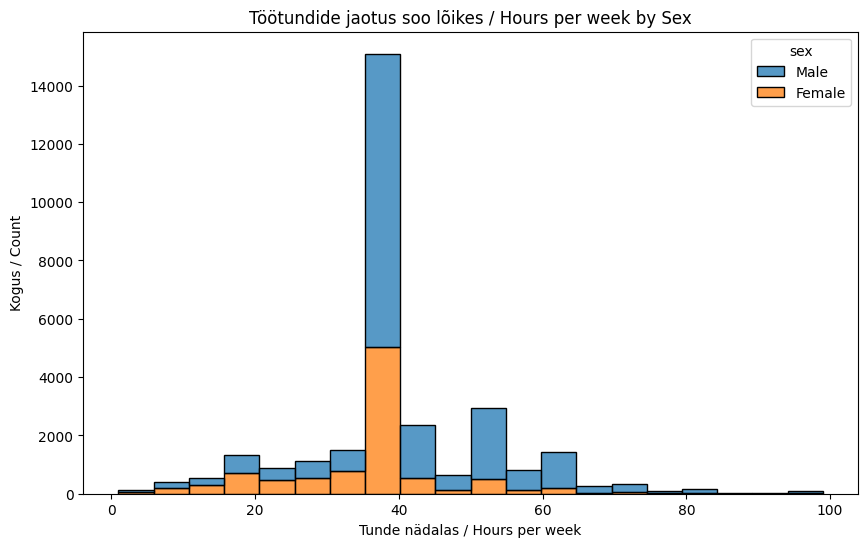

In [9]:
# Töötundide jaotus soo lõikes
plt.figure(figsize=(10, 6))
sns.histplot(data=df_viz, x='hours_per_week', hue='sex', multiple='stack', bins=20)
plt.title('Töötundide jaotus soo lõikes / Hours per week by Sex')
plt.xlabel('Tunde nädalas / Hours per week')
plt.ylabel('Kogus / Count')
plt.show()

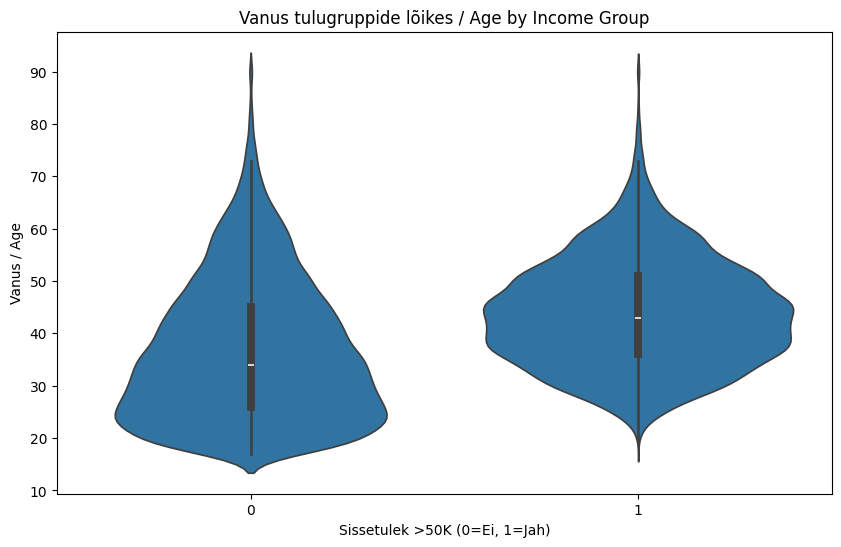

In [10]:
# Vanus tulugruppide lõikes (viiuldiagramm) - kasuta `income_binary`
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_viz, x='income_binary', y='age')
plt.title('Vanus tulugruppide lõikes / Age by Income Group')
plt.xlabel('Sissetulek >50K (0=Ei, 1=Jah)')
plt.ylabel('Vanus / Age')
plt.show()

## 6) Salvesta tabel tagasi csv kujule

Viimase sammuna salvestame puhastatud ja töödeldud andmestiku CSV-faili.

In [12]:
if "google.colab" in sys.modules:
    path = "/content/drive/MyDrive/google_colab/adults_cleaned.csv" # muuda, kui soovid faili salvestada muusse asukohta
else:
    path = "adults_cleaned.csv"

df_viz.to_csv(path, index=False)